# Lab 6: Gaussian Processes - Modeling and Predicting CO2 measurements 

The goals of this lab are:
* Practice using Gaussian processes
* Compare the use of different kernels
* Model CO2 measurements in the atmosphere and make predictions on the CO2 levels in the future

In this lab, we  will be using data from the the Mauna Loa Observatory, which has been making CO2 measurements of the atmopshere on top of Maunaloa since the late 1950's. It has one of the longest consistent set of measurements of CO2 measurements ever made. It is one of the sources of data used to model climate change. More information on the measurements can be found at: https://www.esrl.noaa.gov/gmd/ccgg/about/co2_measurements.html


Created by: Tuan Do

Last modified: Tuan Do

In [1]:
# imports here
import numpy as np
import pandas as pd
import pylab as plt

import matplotlib
font = {        'size'   : 20}
matplotlib.rc('font', **font)

## Part 1 Big Picture 

Using the CO2 measurements that have been made in the past, we want to predict CO2 measurements in the future as well as the uncertainty in the prediction. We also want to differentiate between seasonal variability from long term trends in the data.

We have two major questions to address in this lab:
1. **How far into the future can we reliably predict the CO2 level of the atmosphere using Gaussian Processes?**
2. **Did the CO2 level rise slow due to the global COVID19 pandemic?**

## Part 2 Get the data

The Mauna Loa Observatory makes their data downloadable here: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

We've already downloaded the monthly averaged data into your Lab 6 directory. Load it using the following code.

We will use two of the columns for our work: ``decimal date`` and ``average``, which contains the decimal year for the time and the monthly averaged CO2 concentration in parts per million molecules. 

In [2]:
# load the data
tab = pd.read_csv('co2_mm_mlo.csv',comment='#')

## Part 3 Explore the data

## Question 1
(3 pts)

**Check the shape, and head, plot, visualize, and have a look at the data with whatever ways you think will help your task. What's the time span of the dataset? Etc. Comment throughout on observations.**

In [3]:
# Check the shape of data
print(tab.shape)

(791, 8)


In [4]:
# Check the head of the data
print(tab.head())

   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.70          314.43     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.71     -1 -9.99 -0.99
3  1958      6     1958.4548   317.24          315.14     -1 -9.99 -0.99
4  1958      7     1958.5370   315.86          315.18     -1 -9.99 -0.99


In [5]:
# Describe the data
print(tab.describe())

              year       month  decimal date     average  deseasonalized  \
count   791.000000  791.000000    791.000000  791.000000      791.000000   
mean   1990.624526    6.505689   1991.124379  358.783704      358.783198   
std      19.041177    3.452705     19.041344   31.411617       31.362066   
min    1958.000000    1.000000   1958.202700  312.430000      314.430000   
25%    1974.000000    4.000000   1974.666650  330.230000      330.515000   
50%    1991.000000    7.000000   1991.125000  354.930000      355.260000   
75%    2007.000000    9.500000   2007.583350  384.280000      384.155000   
max    2024.000000   12.000000   2024.041700  424.000000      422.560000   

            ndays        sdev         unc  
count  791.000000  791.000000  791.000000  
mean    19.030341   -2.098521   -0.098647  
std     12.009662    4.535248    0.512949  
min     -1.000000   -9.990000   -0.990000  
25%     10.500000    0.165000    0.065000  
50%     25.000000    0.400000    0.150000  
75%    

Visualizing data: Would be useful to look at change in C02 levels (deseasonlaized and average) as a function of decimal date.

Text(0.5, 1.0, 'Average CO$_2$ Emissions as Function of Years')

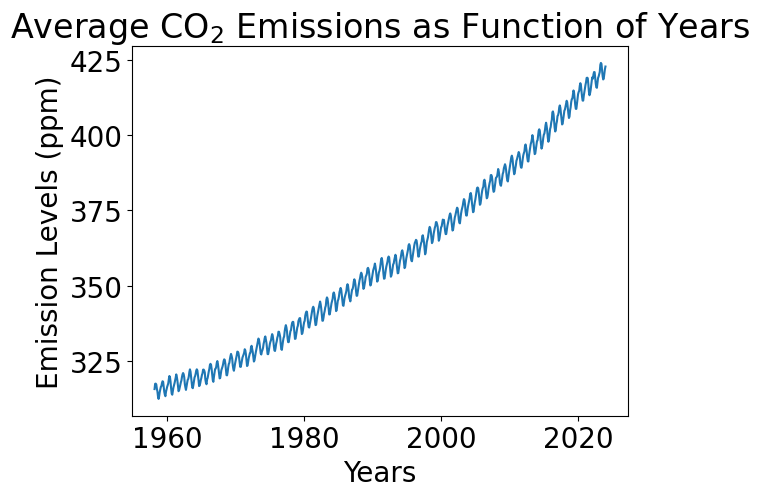

In [6]:
# Something interesting to look at would be the trend in average C02 levels as a function of time
plt.plot(tab["decimal date"], tab["average"])

plt.xlabel("Years")
plt.ylabel("Emission Levels (ppm)")
plt.title("Average CO$_2$ Emissions as Function of Years")

Text(0.5, 1.0, 'Average CO$_2$ Emissions as Function of Years')

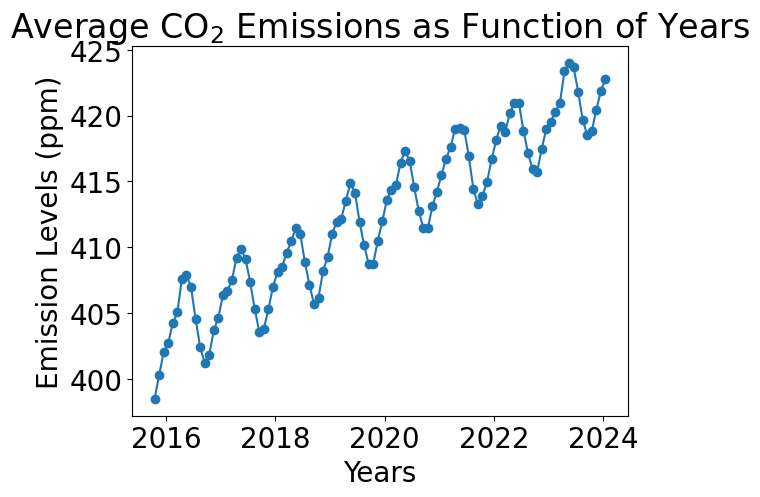

In [7]:
# I believe there would be a dip around COVID (2020) since many businesses and factories were shut down
plt.scatter(tab["decimal date"][-100:], tab["average"][-100:]) 
plt.plot(tab["decimal date"][-100:], tab["average"][-100:]) 

plt.xlabel("Years")
plt.ylabel("Emission Levels (ppm)")
plt.title("Average CO$_2$ Emissions as Function of Years")

Text(0.5, 1.0, 'Relative Change in CO$_2$ Emissions')

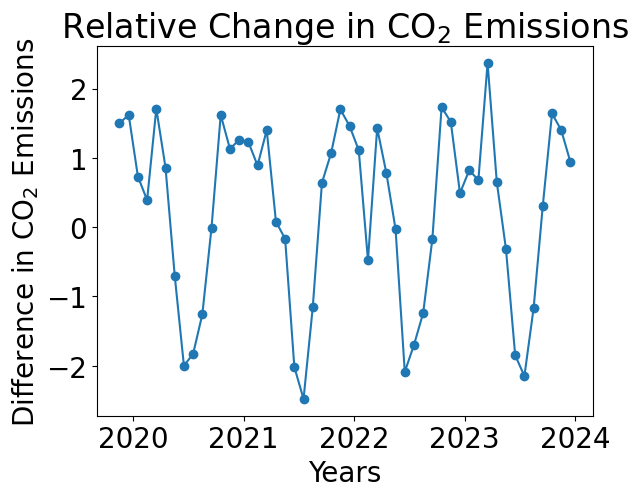

In [8]:
# There seems to be no indication of dip, will see if I can find it by plotting relative change
rel_change = []
arr = np.array(tab["average"])
for i in range(len(arr)-1):
    rel_change.append(arr[i+1] - arr[i])

hip = tab["decimal date"][:-1]

plt.scatter(hip[-50:], rel_change[-50:]) 
plt.plot(hip[-50:], rel_change[-50:])

plt.xlabel("Years")
plt.ylabel("Difference in CO$_2$ Emissions")
plt.title("Relative Change in CO$_2$ Emissions")

Text(0.5, 1.0, 'Deseasonalized Average CO$_2$ Emissions as Function of Years')

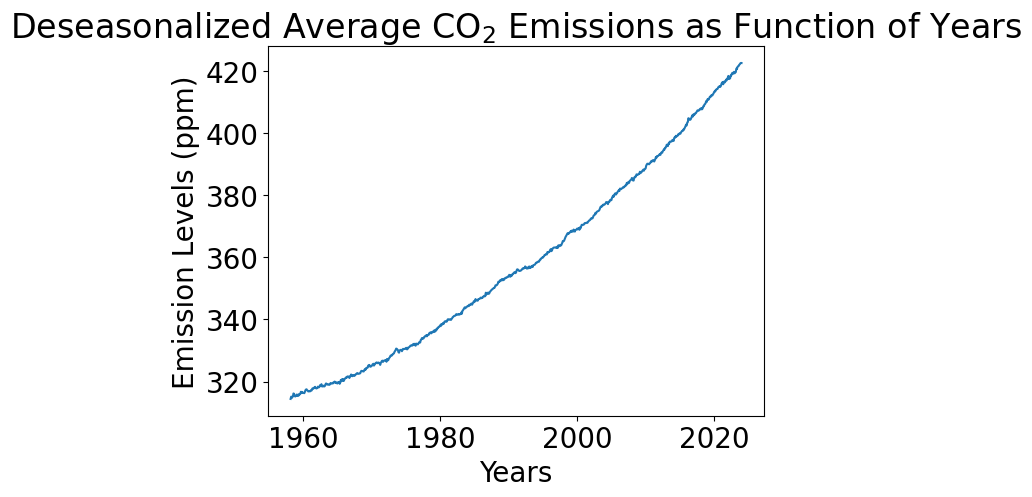

In [9]:
# No evidence CO2 levels signficanlty decreased, but an intersting plot nonetheless
# Will repeat this process for deseasonalized averages
plt.plot(tab["decimal date"], tab["deseasonalized"]) 

plt.xlabel("Years")
plt.ylabel("Emission Levels (ppm)")
plt.title("Deseasonalized Average CO$_2$ Emissions as Function of Years")

Text(0.5, 1.0, 'Deseasonalized Average CO$_2$ Emissions as Function of Years')

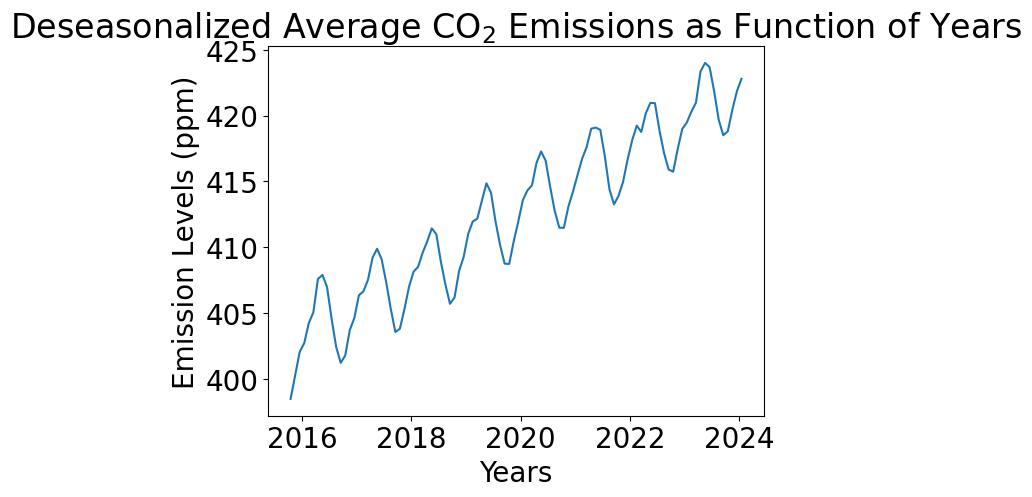

In [10]:
# Zoom int around 2020 to see if there is a dip in this increasing trend
plt.plot(tab["decimal date"][-100:], tab["average"][-100:]) 

plt.xlabel("Years")
plt.ylabel("Emission Levels (ppm)")
plt.title("Deseasonalized Average CO$_2$ Emissions as Function of Years")

Text(0.5, 1.0, 'Relative Change in Deseasonalized CO$_2$ Emissions')

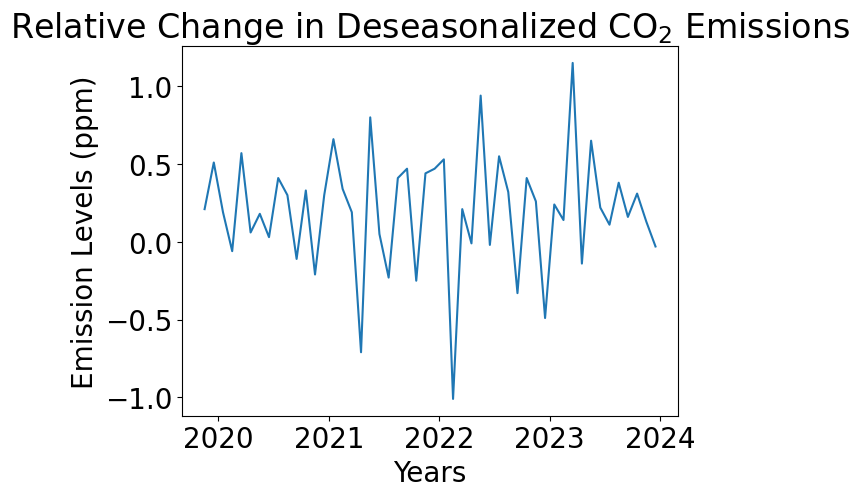

In [11]:
rel_change = []
arr = np.array(tab["deseasonalized"])
for i in range(len(arr)-1):
    rel_change.append(arr[i+1] - arr[i])

hip = tab["decimal date"][:-1]

plt.plot(hip[-50:], rel_change[-50:]) 

plt.xlabel("Years")
plt.ylabel("Emission Levels (ppm)")
plt.title("Relative Change in Deseasonalized CO$_2$ Emissions")

## Part 4 Prepare Data

## Question 2
(2 pts)

**Are there outliers in the dataset? If so remove them and then create your feature (the decimal years) and target arrays (the average CO2 concentration). Use only the data from 1958 to 2010 for training. Make a separate array with the data from the beginning of 2011 to the end of 2019 for testing.**


In [12]:
# No outliers in dataset
# All data follows the same increasing trend and the statistics for current C02 levels matches those given in the dataset

decimal_years = tab["decimal date"]
target = tab["average"]

# Make training split
train_subset = tab[(tab["year"]>=1958.) & (tab["year"]<=2010.)]
X_train = np.array(train_subset["decimal date"])
X_train = np.c_[X_train]
y_train = np.array(train_subset["average"])

# Make test split
test_subset = tab[(tab["year"]>=2011.) & (tab["year"]<=2019.)]
X_test = np.array(test_subset["decimal date"])
X_test = np.c_[X_test]
y_test = np.array(test_subset["average"])

## Part 5 Select model and train


In examining the model, we can see that there is a long term trend but also some periodic variations. We can use a combination of kernels to model the curve. 

Some helpful references for using Gaussian Processes with Scikit Learn are here:
* https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.htm
* https://scikit-learn.org/stable/modules/gaussian_process.html

### Part 5.1 Practice with Kernels

To understand how to use Gaussian processes, we will practice with start by an example of using kernels in Scikit Learn. 

We will start with the Radial Basis Kernel (also known as the squared exponential kernel). This kernel corresponds to a basis set of Gaussians. It is often used to fit time series data that has correlation over some length scale. 

Start by reading about the RBF kernel in Scikit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

Below is some code used to initialize a Gaussian Process regression model and the RBF kernel. Before fitting the data, we can use this model to sample from the prior space of functions that are defined by the kernel. Often it is useful to see the shape and form of the functions that it can model. This will help you get a since of what kernels might be useful for modeling your data.

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)

Text(0.5, 0, 'Years')

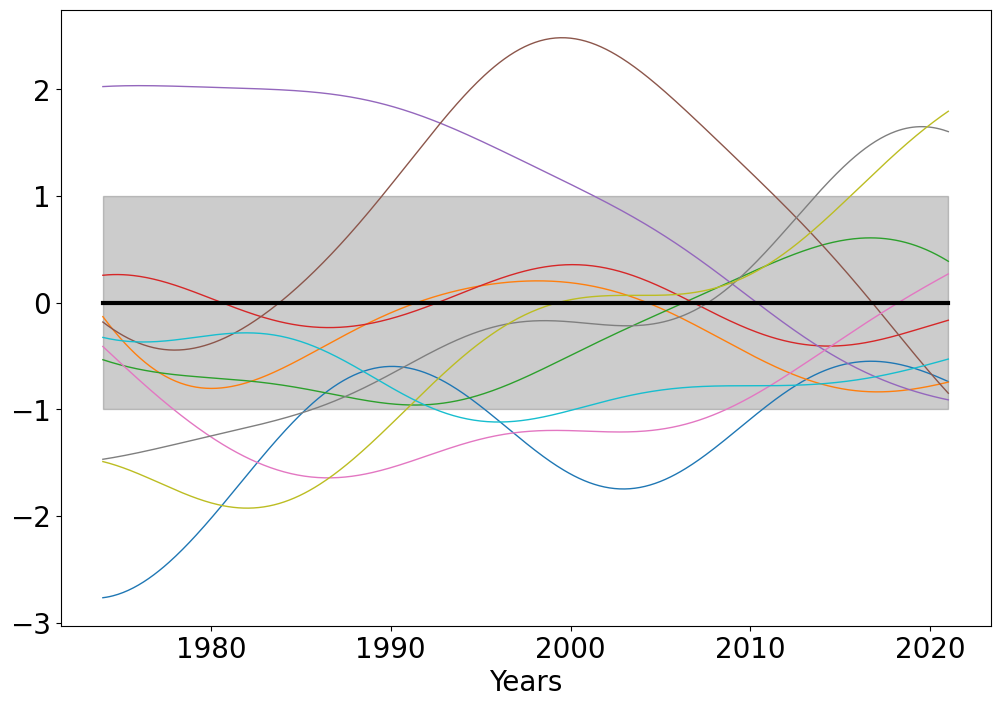

In [14]:
kernel = 1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-1, 10.0))

gp = GaussianProcessRegressor(kernel=kernel)
plt.figure(figsize=(12,8))
X_ = np.linspace(1974, 2021, 500)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.xlabel('Years')

## Question 3
(3 pts)

**In the example code above, what are the hyperparameters of the ``RBF`` kernel? Describe the effect of those parameters.**

The hyperparameters of the RBF kernel are:
1. length_scale: Charactericstic length of x scale over which we expect to see a change in trend of data that we are trying to fit to.
2. length_scale_bounds: Sets upper and lower limits over which the length scale determines trends and any periodicity in data.

## Question 4
(6 pts)

**In a similar way as the example above, examine and plot some samples from the ``ExpSineSquared`` and ``WhiteKernel``. What are the hyperparameters of these kernels? Describe qualitatitvely what the samples from the prior look like for these kernels.**

Text(0.5, 1.0, 'ExpSineSquared Samples')

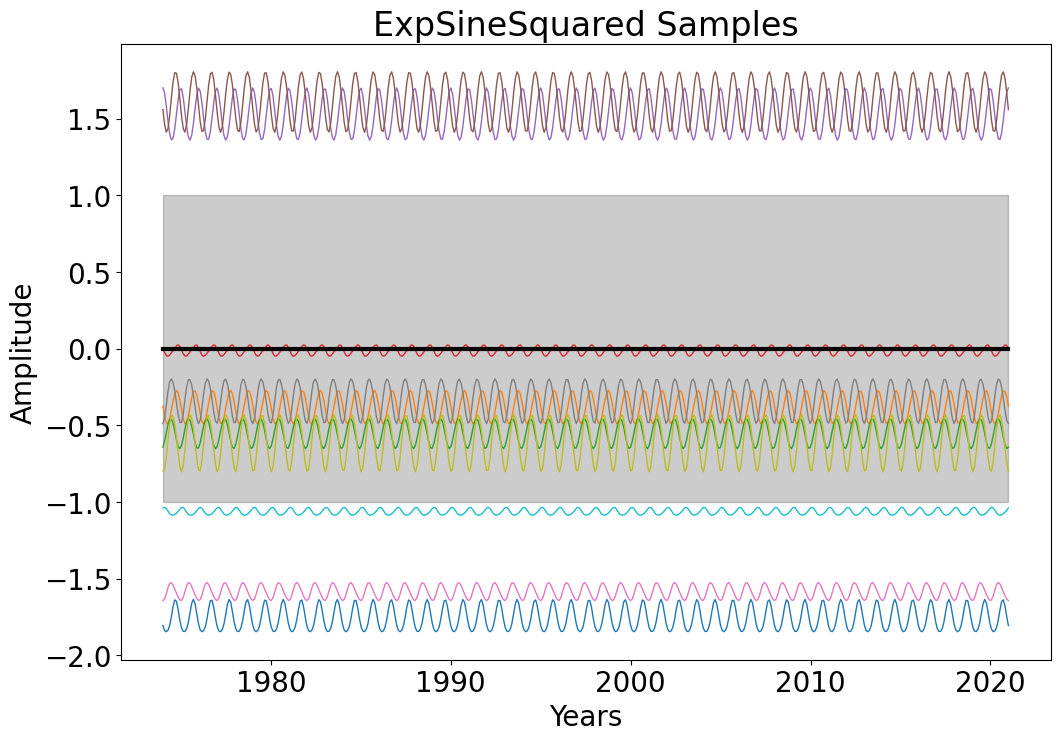

In [15]:
# 1. Plotting samples from ExpSineSquared
kernel2 = 1.0 * ExpSineSquared(length_scale=10.0, length_scale_bounds=(1e-1, 10.0))

gp = GaussianProcessRegressor(kernel=kernel2)
plt.figure(figsize=(12,8))
X_ = np.linspace(1974, 2021, 500)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)

plt.plot(X_, y_samples, lw=1)

plt.xlabel('Years')
plt.ylabel("Amplitude")
plt.title("ExpSineSquared Samples")

The hyperparameters of the ExpSineSquared kernel are:
1. length_scale
2. periodicity
3. length_scale_bounds
4. periodicity_bounds

The samples from the prior appear as sinusoidal waves.

Text(0.5, 1.0, 'White Noise Kernel Samples')

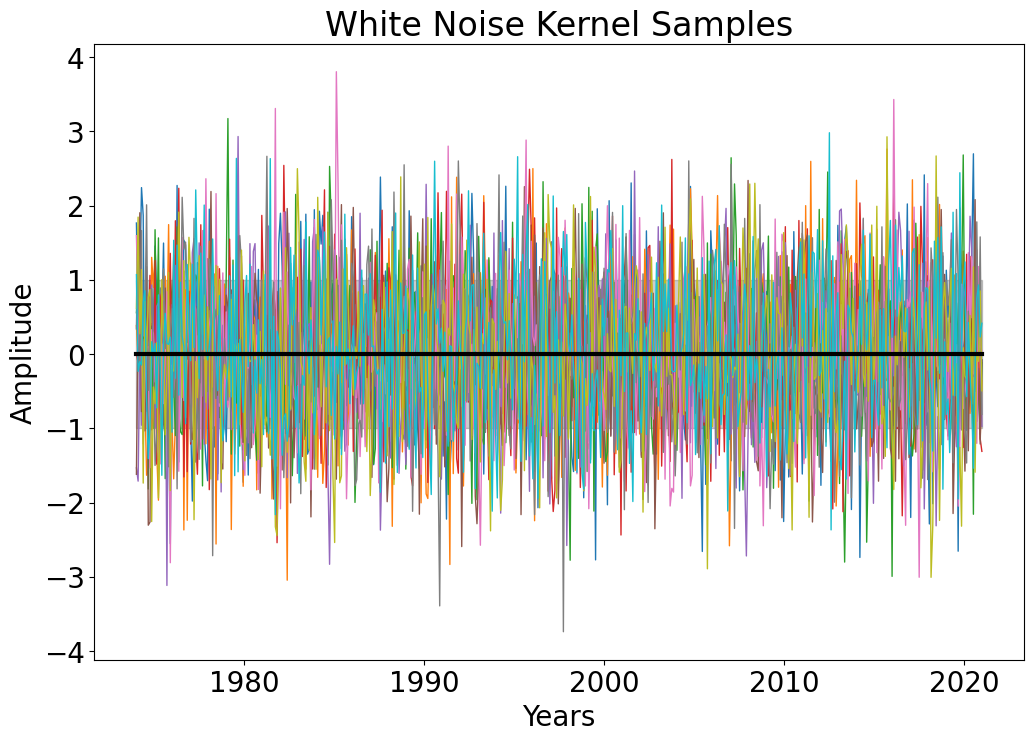

In [16]:
# 1. Plotting samples from WhiteKernel
kernel3 = 1.0 * WhiteKernel()

gp = GaussianProcessRegressor(kernel=kernel3)
plt.figure(figsize=(12,8))
X_ = np.linspace(1974, 2021, 500)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)

plt.plot(X_, y_samples, lw=1)

plt.xlabel('Years')
plt.ylabel("Amplitude")
plt.title("White Noise Kernel Samples")

The hyperparameters of the WhiteKernel kernel are:
1. noise_level
2. noise_level_bounds

The samples from the prior look noisy since random samples are plotted on the time scale of years!

### Part 5.2 Put together a Gaussian Process Model

One of the great propertiers of Gaussian Processes is that you can simply add kernels together to make more complicated models. 


We'll start off first with just the ``RBF`` kernel to fit the long term trends. Below is some example code to show how to do it with Scikit Learn.


In [17]:
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
kernel_gpml = k1    # here we have just 1 kernel

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0.01,normalize_y=True)

# NOTE: running the .fit method will fit for the hyper parameters of the kernel. Fitting might take a while
gp.fit(X_train, y_train)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

GPML kernel: 1.21**2 * RBF(length_scale=16.9)
Log-marginal-likelihood: 566.971


Text(0.5, 1.0, 'Atmospheric CO$_2$ Concentration at Mauna Loa')

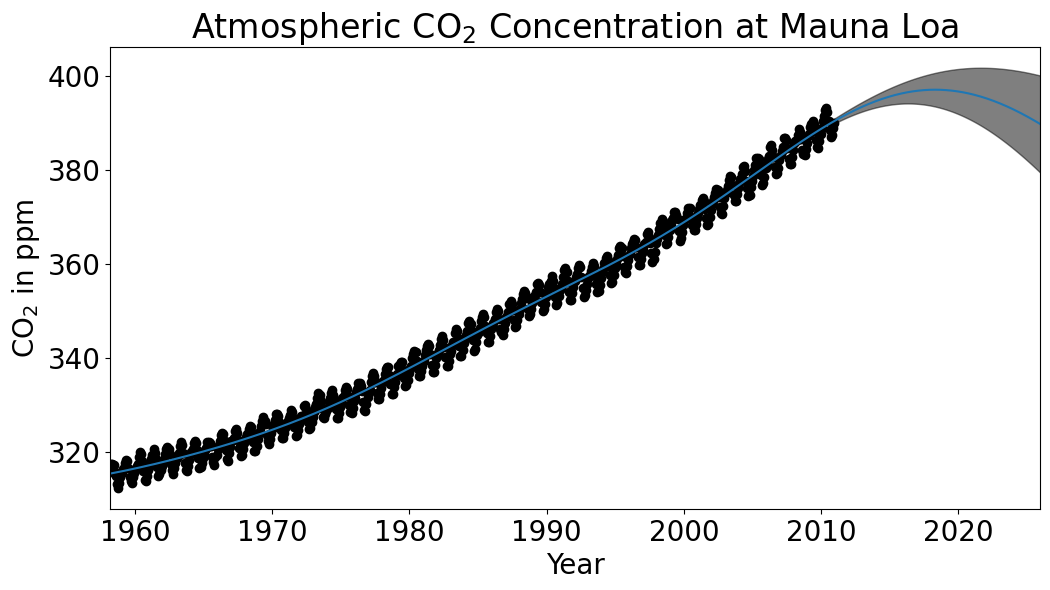

In [18]:
# plot the predictions
X_ = np.linspace(X_train.min(), X_train.max() + 15, 1000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

Similarly, we can use instead the periodic kernel ``ExpSineSquared`` to model the periodic behavior of the curve.

GPML kernel: ExpSineSquared(length_scale=4.43, periodicity=1)
Log-marginal-likelihood: -30637.170


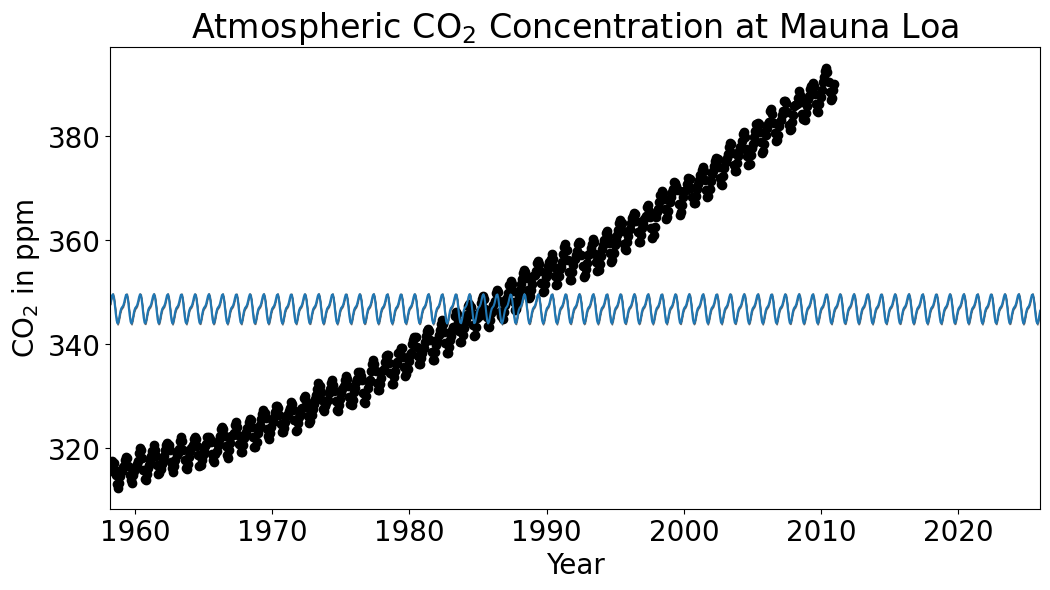

In [19]:
k2 = ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
kernel_gpml = k2    # here we have just 1 kernel

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0.01,normalize_y=True)

# NOTE: running the .fit method will fit for the hyper parameters of the kernel. Fitting might take a while
gp.fit(X_train, y_train)

# Plot the predictions
X_ = np.linspace(X_train.min(), X_train.max() + 15, 1000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

## Question 5
(4 pts)

**Now create a new kernel by adding the ``RBF`` and the ``ExpSineSquared`` kernels together. Make a plot of the fit and the prediction. Plot the test data that you saved from 2011 to 2019. Describe the model performance.**

GPML kernel: 6.15**2 * RBF(length_scale=108) + ExpSineSquared(length_scale=5.09, periodicity=1)
Log-marginal-likelihood: 813.545


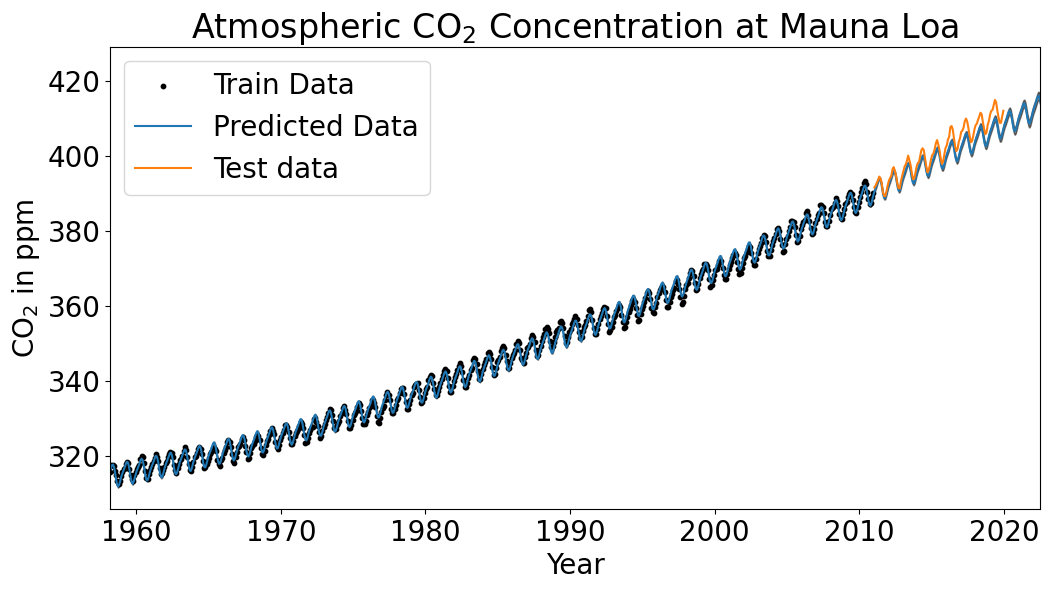

In [20]:
# Kernel: RBF + ExpSineSquared
comb_kernel = k1 + k2
kernel_gpml = comb_kernel

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0.01,normalize_y=True)

# NOTE: running the .fit method will fit for the hyper parameters of the kernel. Fitting might take a while
gp.fit(X_train, y_train)

# Plot the predictions
X_ = np.linspace(X_train.min(), X_train.max() + 15, 1000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, c='k', s=10, label="Train Data")
plt.plot(X_, y_pred, label="Predicted Data")
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

# Plot 2011-2019 data
plt.plot(X_test, y_test, label="Test data")

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

plt.xlim(right=2022.5)
plt.legend(loc="upper left")
plt.show()

## Part 6 Fine tune model

While the major properties of the CO2 curve was represented by our two kernel model, we can do better by allowing for some variations in the long term trend, variations in the periodic signal, and allowing for noise. 

We can do this by adjusting and including more kernels. 

## Question 6
(6 pts)

**Create a kernel as the combination of four components:**

* The same ``RBF`` kernel as in Part 5
* Modify the periodic ``ExpSineSquared`` kernel in Part 5 by **multipyling** it with another ``RBF`` kernel to allow the periodic signal to vary slightly. 
* Add a ``RationalQuadratic`` kernel to account for medium term irregularies
* Add a ``WhiteKernel`` to account for white noise (Gaussian noise) in the modeling
* Hint: if you need help with this, see https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html 

**Fit the data from 1958 to 2010, and the fit the GP model**

In [21]:
# Create mega kernel
k1 = 66.0**2 * RBF(length_scale=67.0)
k2 = RBF(length_scale=67.0) * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
k3 = RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-10, 1e5))

final_kenel = k1 + k2 + k3 + k4
kernel_gpml = final_kenel

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0.01,normalize_y=True)

# NOTE: running the .fit method will fit for the hyper parameters of the kernel. Fitting might take a while
gp.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.01,
                         kernel=66**2 * RBF(length_scale=67) + RBF(length_scale=67) * ExpSineSquared(length_scale=1, periodicity=1) + RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=0.01),
                         normalize_y=True)

**Plot the data and the predictions. Plot the 2011-2021 data and discuss how well it fits. Compare the prediction to that from Part 5.**

GPML kernel: 4.03**2 * RBF(length_scale=77.5) + RBF(length_scale=2.07e+03) * ExpSineSquared(length_scale=5.09, periodicity=1) + RationalQuadratic(alpha=0.0023, length_scale=135) + WhiteKernel(noise_level=1e-10)
Log-marginal-likelihood: 826.441


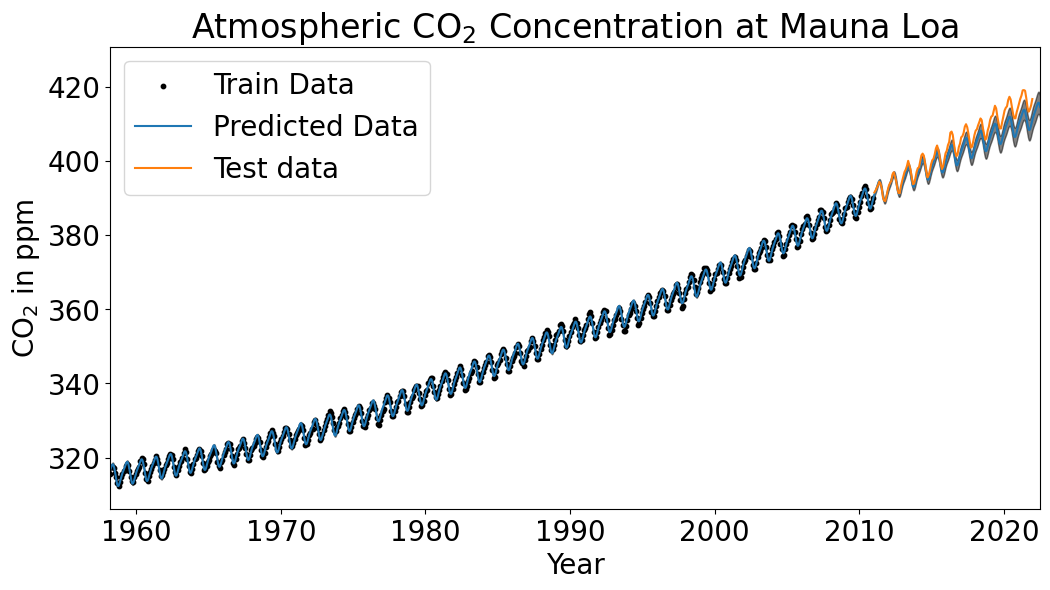

In [22]:
# Plot the data and the predictions
X_ = np.linspace(X_train.min(), X_train.max() + 15, 10000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, c='k', s=10, label="Train Data")
plt.plot(X_, y_pred, label="Predicted Data")
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

# Plot 2011-2021 data
decades_data = tab[(tab["year"]>=2011.) & (tab["year"]<=2021.)]
X_decades_data = np.array(decades_data["decimal date"])
y_decades_data = np.array(decades_data["average"])
plt.plot(X_decades_data, y_decades_data, label="Test data")

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

plt.xlim(right=2022.5)
plt.legend(loc="upper left")
plt.show()

The second model offers a better fit to the data than the model in question 5 since it has a higher Log-marginal-likelihood by about 2%.

## Question 7
(3 pts)

**Explore some variations in the kernels to see if you can get a better prediction**

To improve our kernel, we shall make use of observations made about the trend of the data in the data visualizaton section. These observations are summarized below:
1. Long term increase in trend of data.
2. Periodics sinusoidal like pattern introduced by seasonal variatons.
3. Irregularities in variation of CO2 levels.

In [23]:
# To address point 1, we will use a RBF kernel multiplied with an exponential term to capture the increase with time
long_term_kernel = 50.0**2 * RBF(length_scale=50.0) # Use lone enough time_scale to capture increase in CO2 levels over time

# To address point 2, we will use a ExpSineSquared kernel multiplied with 
# a RBF kernel to accurately capture the trend from seasonal variations
seasonal_variation_kernel = (
    2.0**2 * RBF(length_scale=100.0) * # Want to give a long enough length_scale to capture the increase in values of
                                       # seasonal variation driven by climate change
    ExpSineSquared(length_scale=1.0,   # Seasonal variation takes place in 1 year
                   periodicity=1.0,    # Entire change (period) takes place in 1 year
                   periodicity_bounds="fixed")
)

# To address point 3, we will use a RationalQuadratic kernel
irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=2.0, # Want to measure irregualrities in a given year due to
                                                                     # seasonal variations
                                                   alpha=2.0) # Fit trends over a range of length_scales

# To account for noise in data, we will also add a WhiteKernel multiplied with a RBF kernel
noise_kernel = (
    0.1**2 * RBF(length_scale=0.1) 
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-10, 1e9))
)

optim_kernel = long_term_kernel + seasonal_variation_kernel + irregularities_kernel + noise_kernel

gp = GaussianProcessRegressor(kernel=optim_kernel, alpha=0.01, normalize_y=False)
gp.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.01,
                         kernel=50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) + 0.5**2 * RationalQuadratic(alpha=2, length_scale=2) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))

GPML kernel: 316**2 * RBF(length_scale=138) + 2.69**2 * RBF(length_scale=139) * ExpSineSquared(length_scale=1.5, periodicity=1) + 107**2 * RationalQuadratic(alpha=1e-05, length_scale=173) + 0.187**2 * RBF(length_scale=0.12) + WhiteKernel(noise_level=0.0274)
Log-marginal-likelihood: -144.755


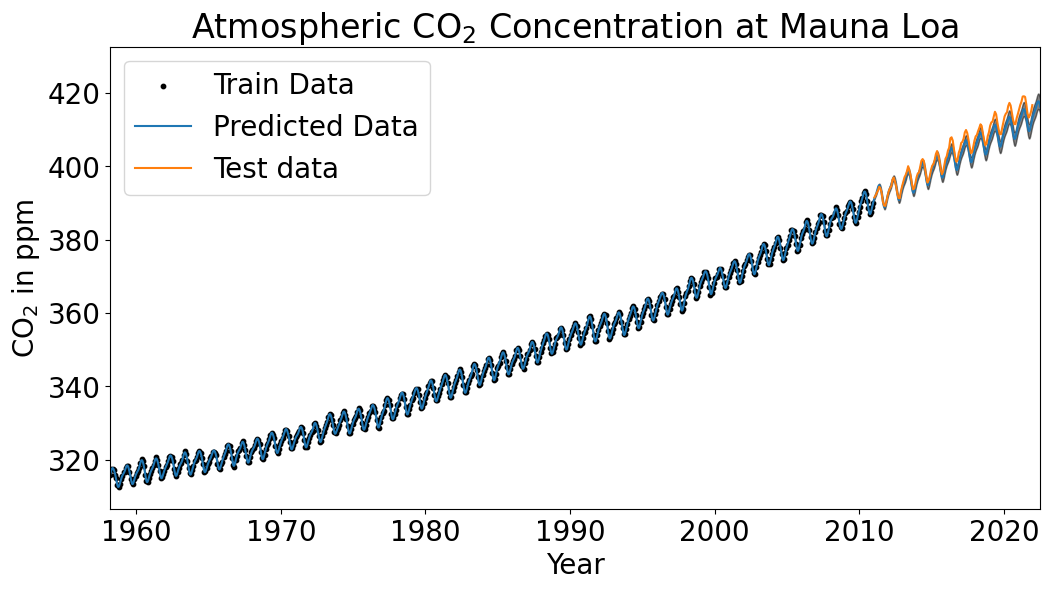

In [24]:
# Plot the data and the predictions
X_ = np.linspace(X_train.min(), X_train.max() + 15, 10000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, c='k', s=10, label="Train Data")
plt.plot(X_, y_pred, label="Predicted Data")
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

# Plot 2011-2021 data
decades_data = tab[(tab["year"]>=2011.) & (tab["year"]<=2021.)]
X_decades_data = np.array(decades_data["decimal date"])
y_decades_data = np.array(decades_data["average"])
plt.plot(X_decades_data, y_decades_data, label="Test data")

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

plt.xlim(right=2022.5)
plt.legend(loc="upper left")
plt.show()

In [25]:
# Grid search to find optimal combination of hyperparameters
from sklearn.model_selection import GridSearchCV

# Make object
irregularities_kernel = 0.5**2 * RationalQuadratic()

optim_kernel = long_term_kernel + seasonal_variation_kernel + irregularities_kernel + noise_kernel
optim_gp = GaussianProcessRegressor(kernel=optim_kernel, alpha=0.01, normalize_y=False)

params_set = {
    "kernel": [irregularities_kernel], # Only want to optimize RationalQuadratic hyperparameters
}

find_optimal_params = GridSearchCV(estimator=optim_gp, param_grid=params_set, cv=5)
find_optimal_params.fit(X_train, y_train)

best_params = find_optimal_params.best_params_
print("Optimal set of RationalQuadratic parameters:", best_params)

/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: C

Optimal set of RationalQuadratic parameters: {'kernel': 0.5**2 * RationalQuadratic(alpha=1, length_scale=1)}


/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GPML kernel: 316**2 * RBF(length_scale=136) + 2.66**2 * RBF(length_scale=140) * ExpSineSquared(length_scale=1.5, periodicity=1) + 13.6**2 * RationalQuadratic(alpha=0.000593, length_scale=22.1) + 0.187**2 * RBF(length_scale=0.12) + WhiteKernel(noise_level=0.0273)
Log-marginal-likelihood: -144.957


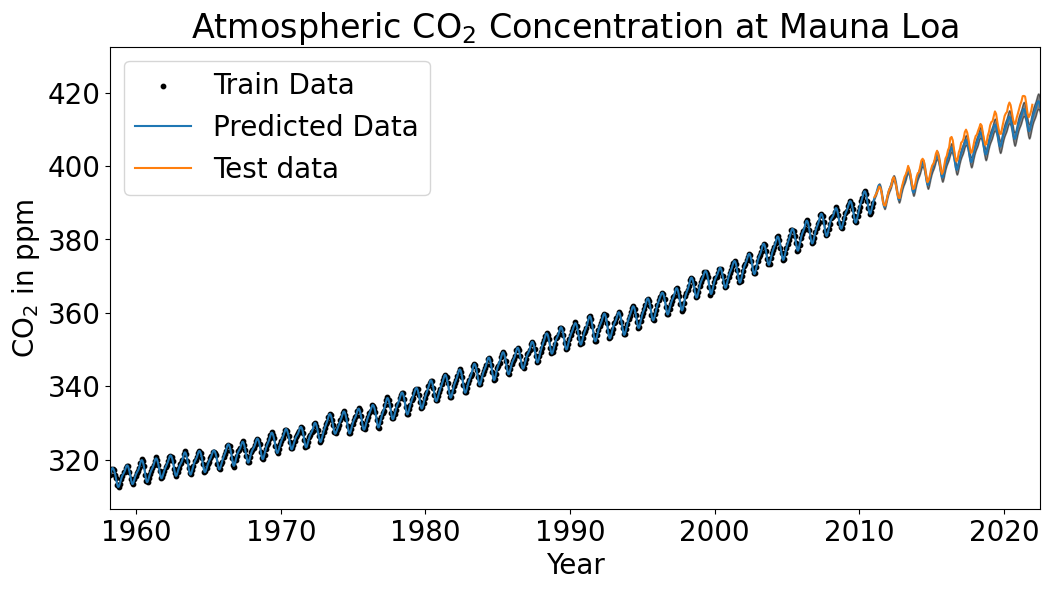

In [26]:
# Plot the data and the predictions for best fit kernels

long_term_kernel = 50.0**2 * RBF(length_scale=50.0)

seasonal_variation_kernel = (
    2.0**2 * RBF(length_scale=100.0) *
    ExpSineSquared(length_scale=1.0,
                   periodicity=1.0,
                   periodicity_bounds="fixed")
)

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

noise_kernel = (
    0.1**2 * RBF(length_scale=0.1) 
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-10, 1e9))
)

optim_kernel = long_term_kernel + seasonal_variation_kernel + irregularities_kernel + noise_kernel

gp = GaussianProcessRegressor(kernel=optim_kernel, alpha=0.01, normalize_y=False)
gp.fit(X_train, y_train)

X_ = np.linspace(X_train.min(), X_train.max() + 15, 10000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, c='k', s=10, label="Train Data")
plt.plot(X_, y_pred, label="Predicted Data")
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

# Plot 2011-2021 data
decades_data = tab[(tab["year"]>=2011.) & (tab["year"]<=2021.)]
X_decades_data = np.array(decades_data["decimal date"])
y_decades_data = np.array(decades_data["average"])
plt.plot(X_decades_data, y_decades_data, label="Test data")

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

plt.xlim(right=2022.5)
plt.legend(loc="upper left")
plt.show()

## Assessing the effects of COVID19 on CO2 levels

## Question 8 
(2 pts)

**First, without looking at the data, predict would happen to the CO2 levels in 2020 to recent times. Could the COVID19 pandemic affect these levels? Why or why not?**



I would predict a similar increasing trend from 2020 to recent times. However, due to the COVID 19 pandemic, I would expect there to be a sharper drop between March-August 2020 since that's when many nations went into lockdown and numerous industries shut down which should reduce overall CO$_2$ trends.

## Question 9
(2 pts)

**Now, go back and fit your GP model on data from up to 2019. Then, predict the CO2 levels in 2020 to the most recent year**

In [27]:
# Subset data to be from up to 2019
until_2019 = tab[tab["year"]<=2019.]
X_until_2019 = np.asarray(until_2019["decimal date"])
X_until_2019 = np.c_[X_until_2019]                        
y_until_2019 = np.asarray(until_2019["average"])

# Fit gp model on new data
gp = GaussianProcessRegressor(kernel=optim_kernel, alpha=0.01, normalize_y=False)
gp.fit(X_until_2019, y_until_2019)

/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.01,
                         kernel=50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))

GPML kernel: 316**2 * RBF(length_scale=139) + 2.92**2 * RBF(length_scale=172) * ExpSineSquared(length_scale=1.47, periodicity=1) + 107**2 * RationalQuadratic(alpha=1e-05, length_scale=171) + 0.189**2 * RBF(length_scale=0.117) + WhiteKernel(noise_level=0.0296)
Log-marginal-likelihood: -185.244


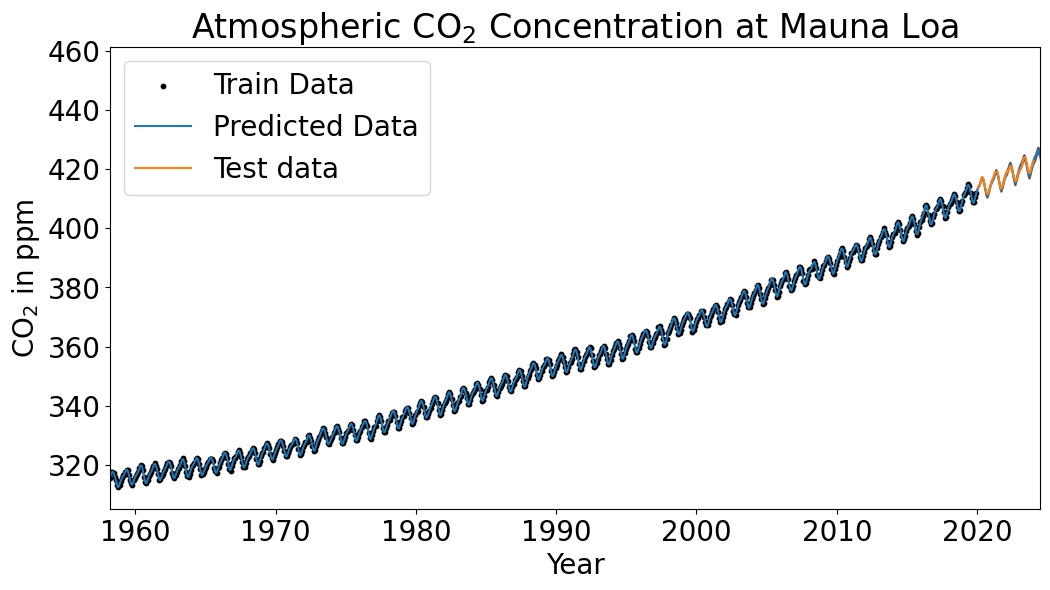

In [28]:
# Plot the data and the predictions
X_ = np.linspace(X_until_2019.min(), X_until_2019.max() + 15, 10000)[:, np.newaxis] # predict 10 years into the future
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(12,6))
plt.scatter(X_until_2019, y_until_2019, c='k', s=10, label="Train Data")
plt.plot(X_, y_pred, label="Predicted Data")
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ Concentration at Mauna Loa")

# Plot 2024-now data
recent_data = tab[(tab["year"]>=2020.)]
X_recent_data = np.array(recent_data["decimal date"])
y_recent_data = np.array(recent_data["average"])
plt.plot(X_recent_data, y_recent_data, label="Test data")

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

plt.xlim(right=2024.5)
plt.legend(loc="upper left")
plt.show()

## Question 10
(3 pts)

**Describe whether what you found meets your expectations. Why or why not?**

Given the data until 2019, I expected this model would predict the level of CO$_2$ emissions to follow the same increasing, and almost cyclic pattern upwards. As expected, the performance of the model improves with more data and this is demonstrated from the accuracy as shown in the above plot. However, I expected a significant drop in CO$_2$ emissions around 2020 which did not occur. There seems to be a negligible decrease in the rising trend, and this is supplemented by the accuracy of the model.

## Part 7 Present solution


## Question 11
(4 pts)

**Discuss the model which appears to perform best: what kernels did you end up using? What are the hyperparameters of the best kernel?**

The model composing of 4 kernels: long_term_kernel, seasonal_variation_kernel, irregularities_kernel, and noise_kernel performed the best. This was determined by evaluating the log-marginal-likelihood score of each GaussianProcessRegressor, Additionally, the model which was trained using data until 2019 produced the best fit.

The hyperparameters for the best fit were:
1. long_term_kernel with length_scale=50 for RBF kernel to capture long term increasing trend in data.
2. seasonal_variation_kernel with periodicity=1 and length_scale=1 for the ExpSineSquared kernel since an entire cycle in variation of seasons takes place in 1 year. length_scale=50 was provided for RBF kernel = 100 to capture the long term increase in seasonal values of data.
3. irregularities_kernel with length_scale=1.0 and alpha=1.0 for the RationalQuadratic kernel to capture any variations as determined by GridSearch.
4. noise_kernel with noise_level=0.1**2 to capture the noise at each individual data point on a finely resolved time scale. RBF has lgth_scale=0.1 to capture the increase in values of each individual data point.

## Part 8  Launch, Monitor and Maintain

Nothing to here for this lab. 



**All done! Nice job!**